In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


### Importing and Understanding data

In [2]:
columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',    "radius_se","texture_se","perimeter_se","area_se","smoothness_se","sompactness_se","concavity_se","concave points_se","symmetry_se","fractal dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal dimension_worst" ]

In [3]:
'''df = pd.read_csv('wdbc.data', header = None)


df.head()'''


"df = pd.read_csv('wdbc.data', header = None)\n\n\ndf.head()"

In [4]:
import pandas as pd
import requests

# Load dataset from a local file or URL
columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',    "radius_se","texture_se","perimeter_se","area_se","smoothness_se","sompactness_se","concavity_se","concave points_se","symmetry_se","fractal dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal dimension_worst" ]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header = None, names = columns)


df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [5]:
df.shape  ## Dimensions of the data

(569, 32)

In [6]:
df.size

18208

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
sompactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
df.columns = df.columns.str.replace('sompactness_se', 'compactness_se')
df.columns = df.columns.str.replace('fractal dimension_se', 'fractal_dimension_se')
df.columns = df.columns.str.replace('fractal dimension_worst', 'fractal_dimension_worst')
df.columns = df.columns.str.replace('concave points_se', 'concave_points_se')
df.columns = df.columns.str.replace('concave points_worst', 'concave_points_worst')



In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave_points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [11]:
### No null values are present

### Data Cleaning

In [12]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
df = df.dropna(axis = 1)

In [14]:
df.duplicated().sum()
## No duplicates either

0

### Creating a Copy DataFrame

In [15]:
df_copy = df.copy()

In [16]:
df_copy = df_copy.drop(columns = ['id']) # Removing unwanted columns Once deleted  comment it

In [17]:
### Converting diagnosis to numerical

In [18]:

df_copy['diagnosis'] = df_copy['diagnosis'].replace({'M': 1, 'B': 0})


In [19]:
df_copy['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

###  Finding outliers for each column

<Figure size 1200x1200 with 0 Axes>

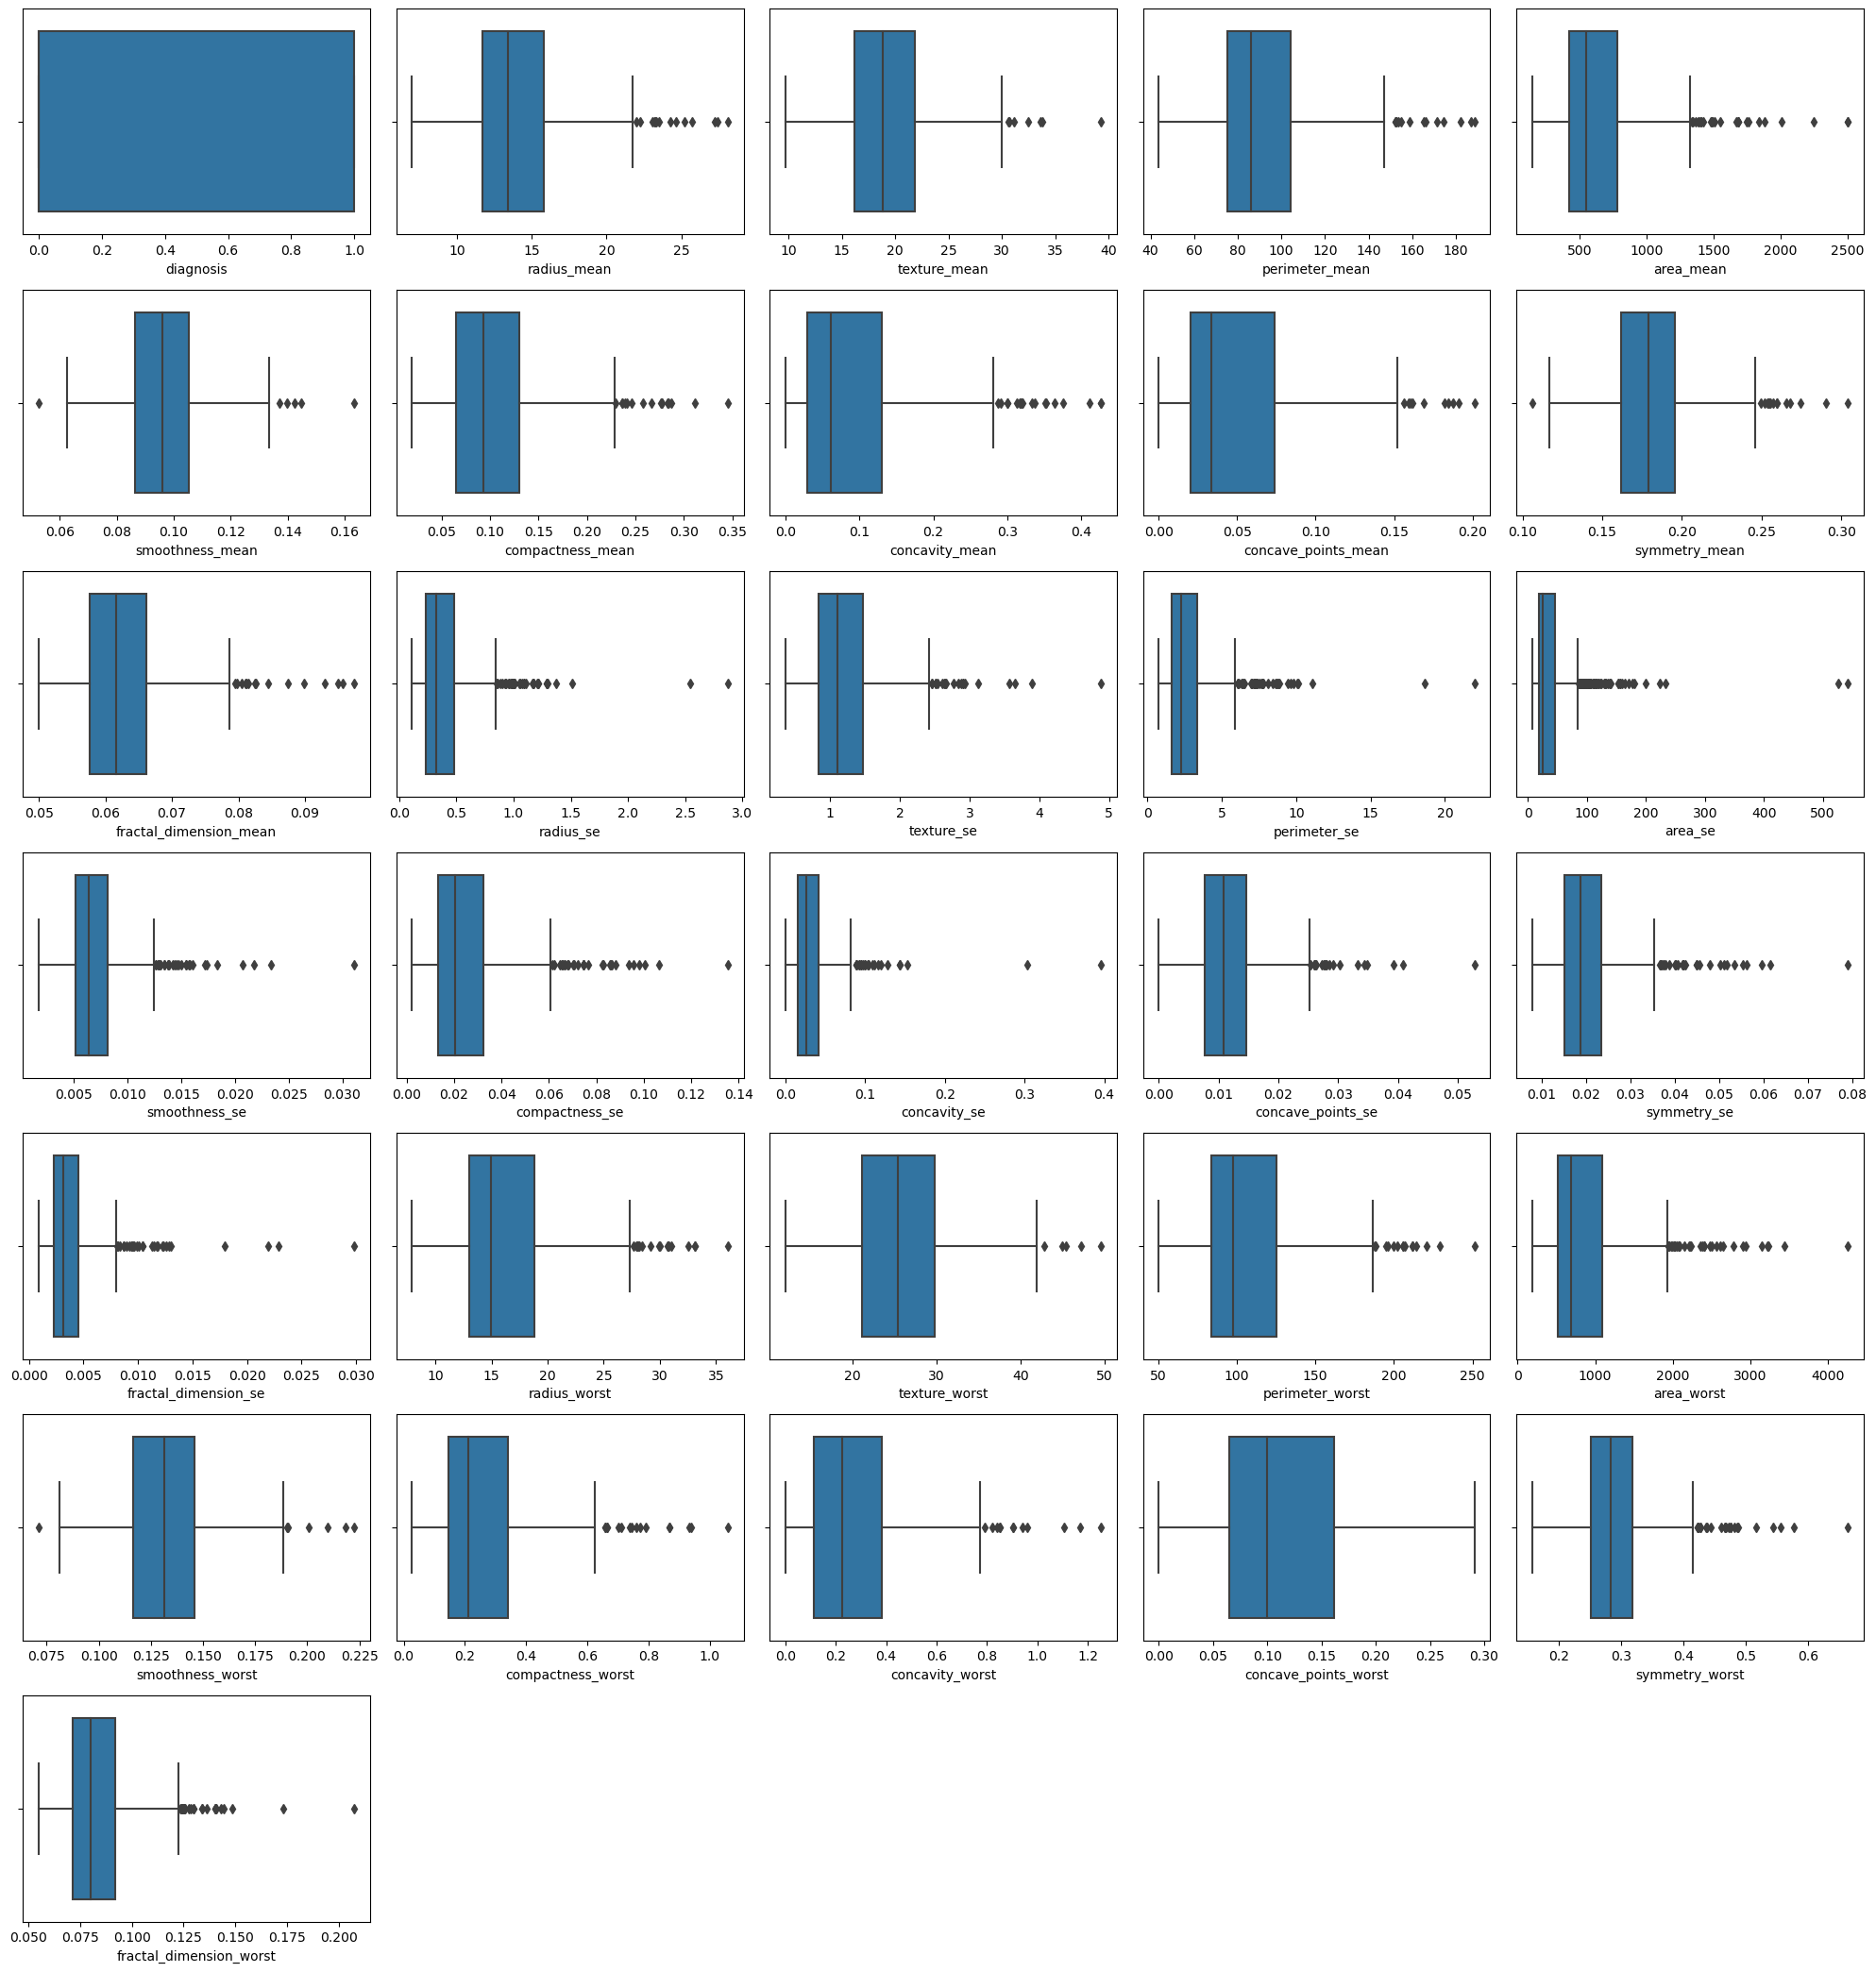

In [20]:
plt.figure(figsize = (12, 12))

total_boxes = len(df_copy.columns)
n_cols = 5  
n_rows = (total_boxes + n_cols - 1) // n_cols

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))

# Iterate over the categorical columns
for i, col in enumerate(df_copy.columns):
    # Calculate the row and column indices for the current subplot
    row_idx = i // n_cols
    col_idx = i % n_cols

    # Create a boxplot for the current column
    sns.boxplot(data=df_copy, x=col, ax=axs[row_idx, col_idx])

for i in range(total_boxes, n_rows * n_cols):
    row_idx = i // n_cols
    col_idx = i % n_cols
    axs[row_idx, col_idx].axis('off')

# Layout so plots do not overlap
plt.tight_layout()

plt.show()
    

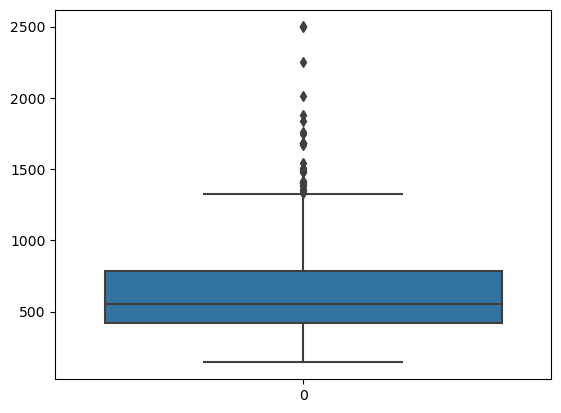

In [21]:
sns.boxplot(df_copy['area_mean'])
plt.show()

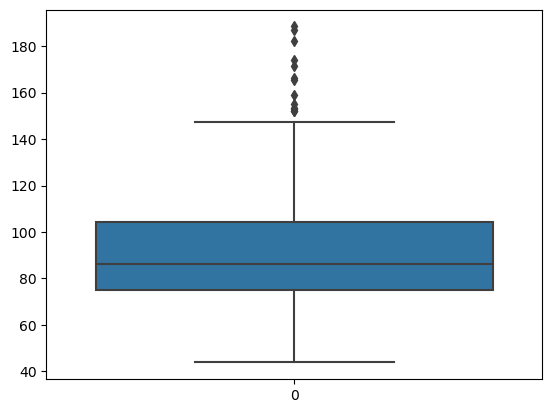

In [22]:
sns.boxplot(df_copy['perimeter_mean'])
plt.show()

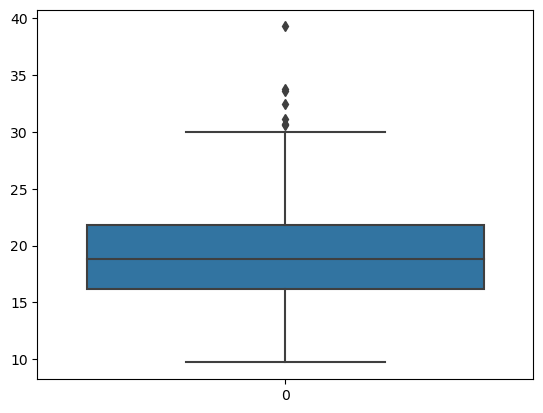

In [23]:
sns.boxplot(df_copy['texture_mean'])
plt.show()

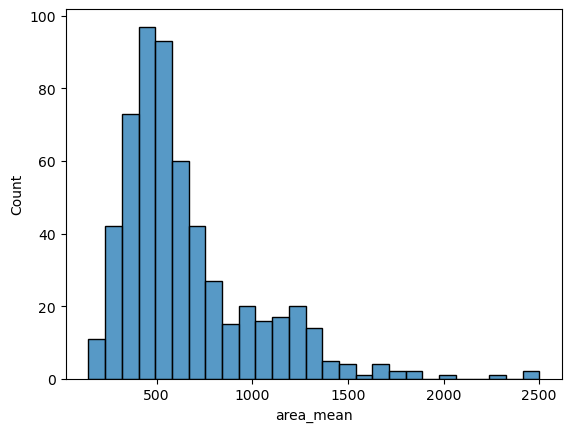

In [24]:
sns.histplot(df['area_mean'])
plt.show()


C:\Users\thall\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x400 with 0 Axes>

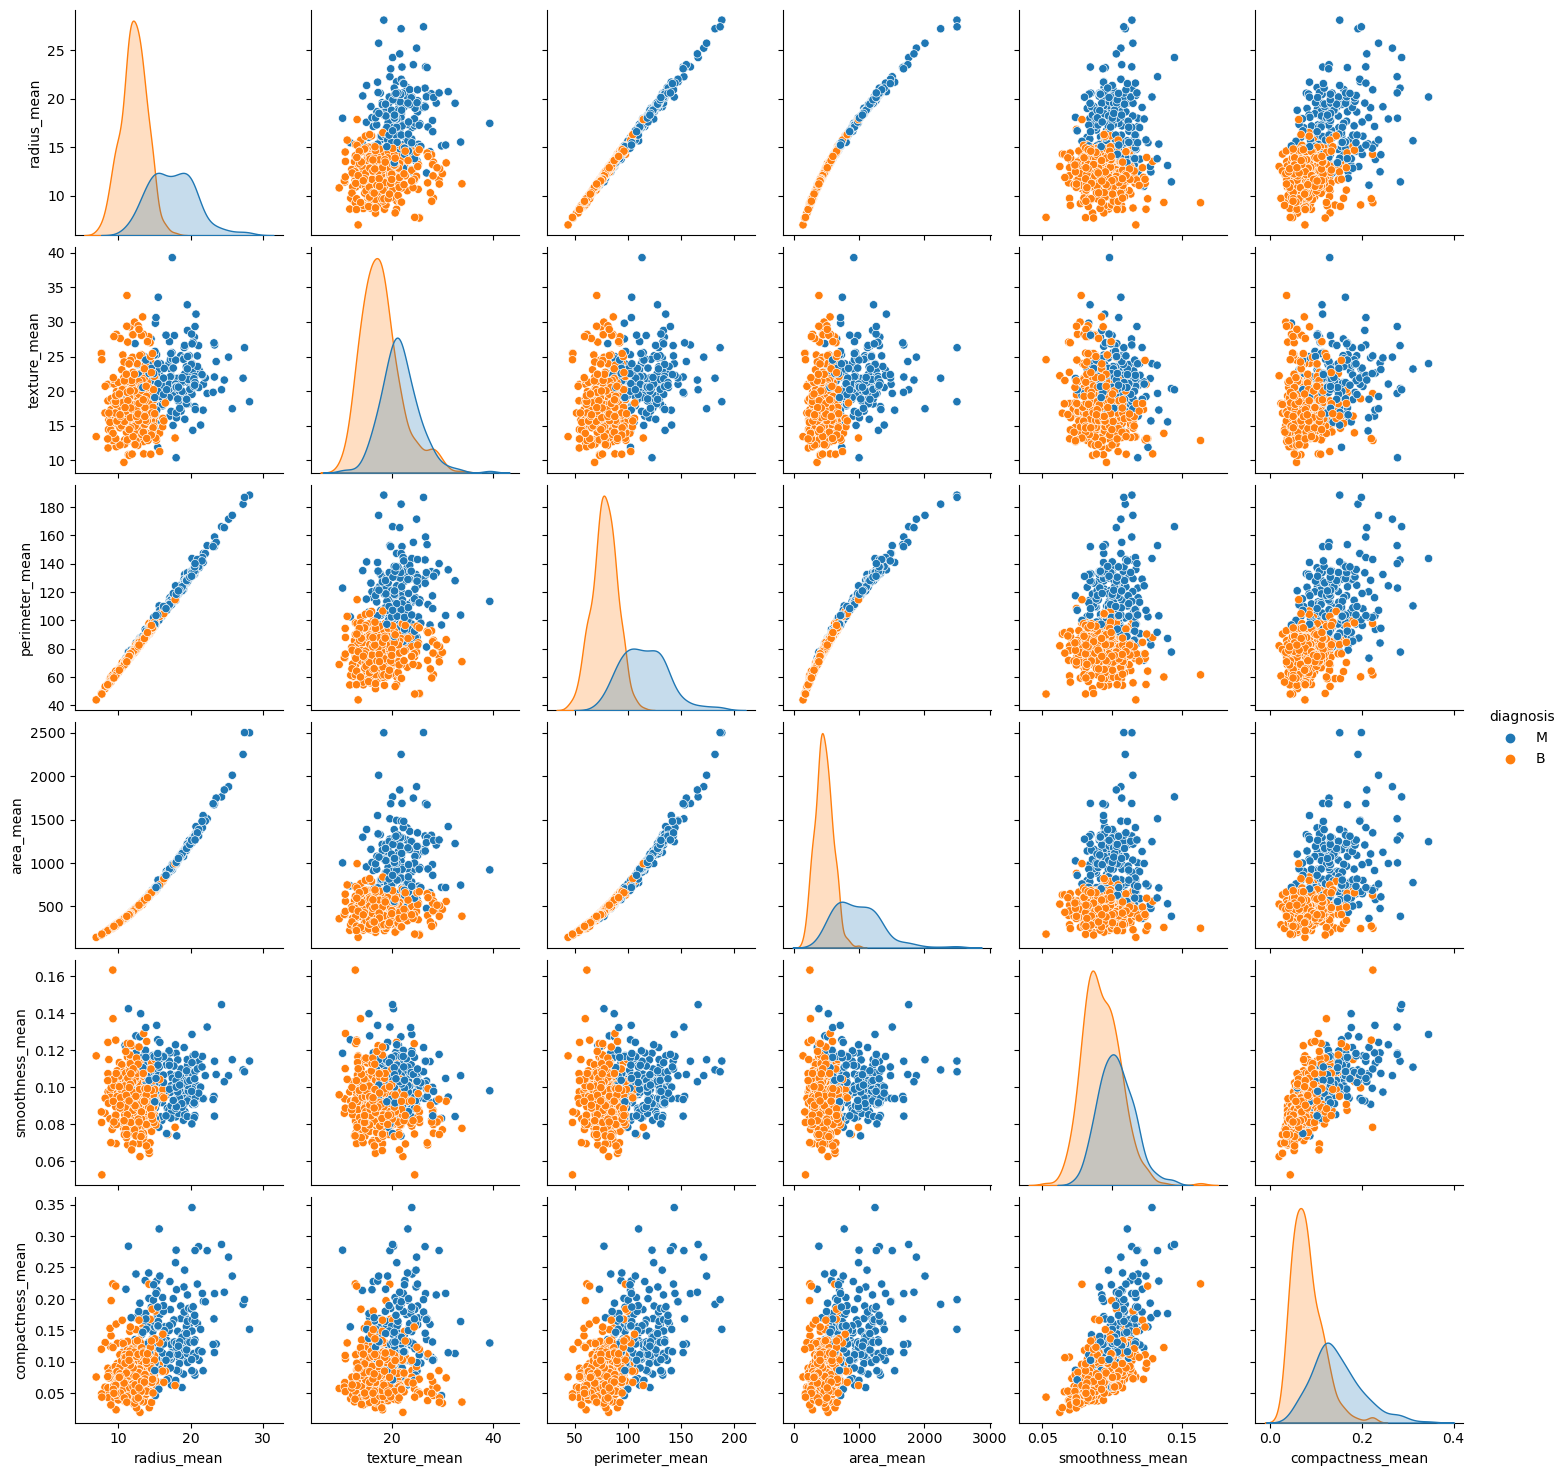

In [25]:
plt.figure(figsize = (4, 4))
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'diagnosis']], hue='diagnosis')
plt.show()


In [26]:
"""from collections import Counter

def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
list_atributes = df.drop('diagnosis',axis=1).columns
Outliers_to_drop = detect_outliers(df,2,list_atributes)
print(len(Outliers_to_drop))"""

"from collections import Counter\n\ndef detect_outliers(train_data,n,features):\n    outlier_indices = []\n    for col in features:\n        # 1st quartile (25%)\n        Q1 = np.percentile(train_data[col], 25)\n        # 3rd quartile (75%)\n        Q3 = np.percentile(train_data[col],75)\n        # Interquartile range (IQR)\n        IQR = Q3 - Q1\n        outlier_step = 1.5 * IQR\n        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index\n        outlier_indices.extend(outlier_list_col)\n        \n    outlier_indices = Counter(outlier_indices)        \n    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )\n    \n    return multiple_outliers   \n\n# detect outliers\nlist_atributes = df.drop('diagnosis',axis=1).columns\nOutliers_to_drop = detect_outliers(df,2,list_atributes)\nprint(len(Outliers_to_drop))"

In [27]:
df_copy.columns[1:]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [28]:
### Finding Outliers and removing all at once instead of checking column after column, we remove all at the end
def remove_outliers(data_df, features):
    
    mask = pd.Series(True, index = data_df.index)  ## creates a series of True for given index

    for col in features:

        Q1 = data_df[col].quantile(0.25)

        Q3 = data_df[col].quantile(0.75)

        IQR =Q3 - Q1
        
        ## REMOVING OUTLIERS
        col_mask = (data_df[col] >= (Q1 - 1.5 * IQR)) & (data_df[col] <= (Q3 + 1.5 * IQR))
        
        mask = mask & col_mask
        
        
    return data_df[mask]

df_copy = remove_outliers(df_copy, df_copy.columns[1:])  ## Here excluding the target variable 
df_copy.shape

(398, 31)

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 6 to 566
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave_points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  398 no

In [30]:
df_copy.isnull().sum() # No null values are inserted

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [31]:
df_copy.groupby('diagnosis').mean()


radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
0             12.41097     17.638300       79.713733  481.742000   
1             16.33102     21.161735      106.881429  842.403061   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
0                 0.091401          0.075990        0.040540   
1                 0.098997          0.117699        0.121368   

           concave_points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
0                     0.024900       0.170744                0.061459  ...   
1                     0.069583       0.182501                0.060451  ...   

           radius_worst  texture_worst  perimeter_worst   area_worst  \
diagnosis                                                              
0             13.683180      23.314233        88.936567   582.895667   
1             19.386939      29.035612       128.346327  1174.112245   

           smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                         
0                  0.124096           0.178691         0.158547   
1                  0.142729           0.312020         0.381512   

           concave_points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
0                      0.075607        0.270458                 0.077457  
1                      0.159780        0.305523                 0.085870  

[2 rows x 30 columns]

In [32]:
df_copy.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.680705      0.388596        0.695835   
radius_mean               0.680705     1.000000      0.280796        0.998113   
texture_mean              0.388596     0.280796      1.000000        0.285880   
perimeter_mean            0.695835     0.998113      0.285880        1.000000   
area_mean                 0.698005     0.992047      0.288688        0.990235   
smoothness_mean           0.271570     0.055311     -0.046879        0.093196   
compactness_mean          0.514346     0.442360      0.181078        0.492915   
concavity_mean            0.710567     0.658031      0.295111        0.696240   
concave_points_mean       0.752190     0.755607      0.239147        0.785954   
symmetry_mean             0.243588     0.075653      0.051037        0.102371   
fractal_dimension_mean   -0.086631    -0.436397     -0.110214       -0.393736   
radius_se                 0.571842     0.534801      0.290195        0.542837   
texture_se                0.007755    -0.149935      0.474188       -0.144895   
perimeter_se              0.565909     0.530347      0.294101        0.546622   
area_se                   0.703715     0.758127      0.325637        0.763671   
smoothness_se            -0.036030    -0.301325      0.089100       -0.283129   
compactness_se            0.229104     0.165214      0.212798        0.207785   
concavity_se              0.325974     0.265486      0.242464        0.302232   
concave_points_se         0.387972     0.363046      0.198599        0.394612   
symmetry_se              -0.194890    -0.327179      0.011039       -0.318263   
fractal_dimension_se      0.062799    -0.100183      0.095912       -0.063267   
radius_worst              0.761081     0.971286      0.311152        0.972912   
texture_worst             0.437909     0.273847      0.914721        0.280552   
perimeter_worst           0.768194     0.964851      0.316562        0.971558   
area_worst                0.773626     0.957772      0.317755        0.959710   
smoothness_worst          0.396847     0.087209      0.069886        0.121237   
compactness_worst         0.533996     0.416464      0.216026        0.460901   
concavity_worst           0.653300     0.563240      0.274070        0.599672   
concave_points_worst      0.726639     0.682235      0.238186        0.712906   
symmetry_worst            0.347406     0.137655      0.076977        0.160178   
fractal_dimension_worst   0.290821    -0.014583      0.060915        0.027877   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.698005         0.271570          0.514346   
radius_mean               0.992047         0.055311          0.442360   
texture_mean              0.288688        -0.046879          0.181078   
perimeter_mean            0.990235         0.093196          0.492915   
area_mean                 1.000000         0.058280          0.428703   
smoothness_mean           0.058280         1.000000          0.675183   
compactness_mean          0.428703         0.675183          1.000000   
concavity_mean            0.664847         0.463982          0.837473   
concave_points_mean       0.758145         0.522678          0.805062   
symmetry_mean             0.077918         0.494062          0.470457   
fractal_dimension_mean   -0.423006         0.614693          0.478338   
radius_se                 0.561732         0.224720          0.384081   
texture_se               -0.132103         0.056968         -0.007041   
perimeter_se              0.554631         0.213312          0.467098   
area_se                   0.786897         0.181729          0.431306   
smoothness_se            -0.260649         0.330804          0.115057   
compactness_se            0.161122         0.240507          0.696339   
concavity_se              0.268137         0.230219          0.637905   
concave_points_se         0.354173         0.

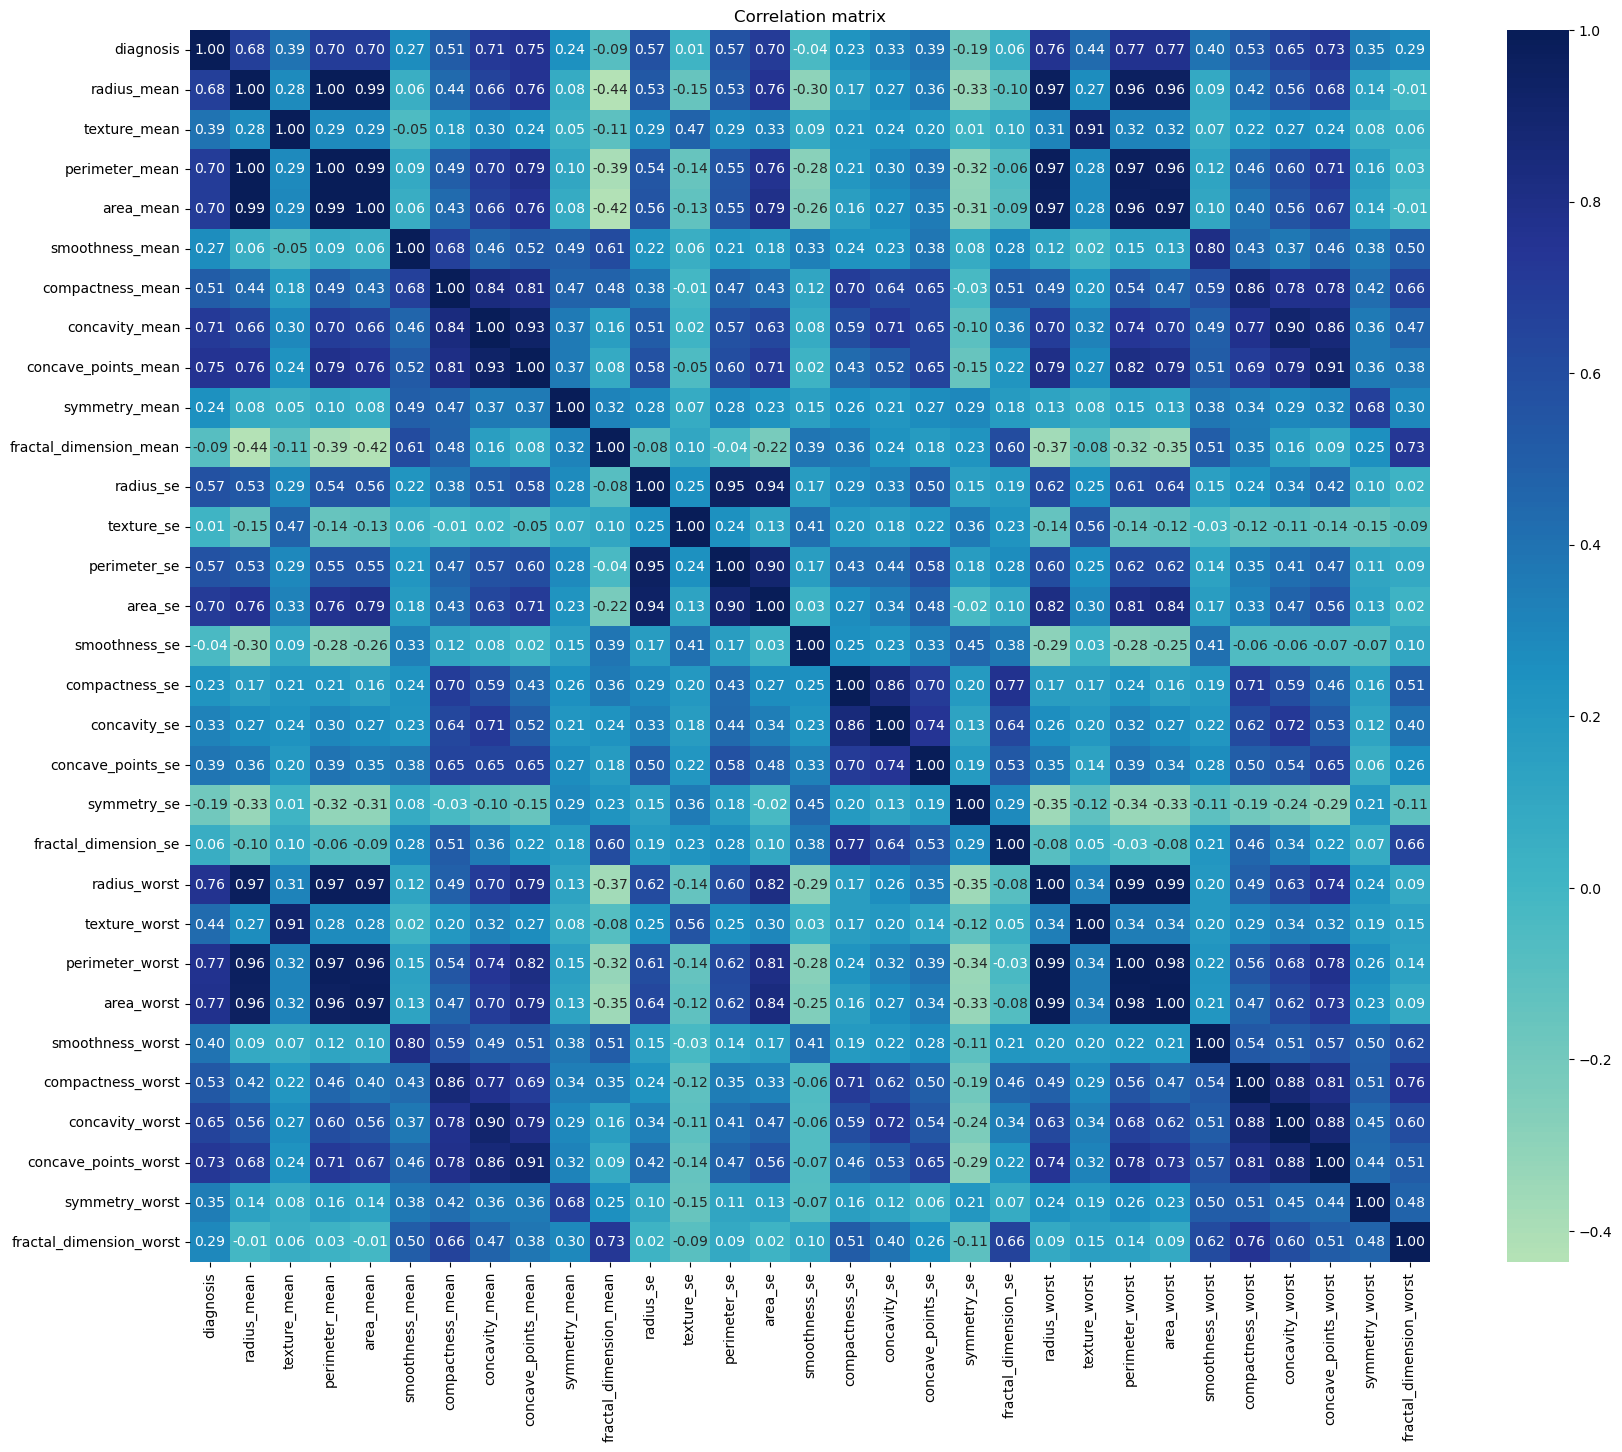

In [33]:
plt.figure(figsize = (20,16))

sns.heatmap(df_copy.corr(), annot = True, center = 0, fmt = ".2f", cmap="YlGnBu")
plt.title("Correlation matrix")
plt.show()

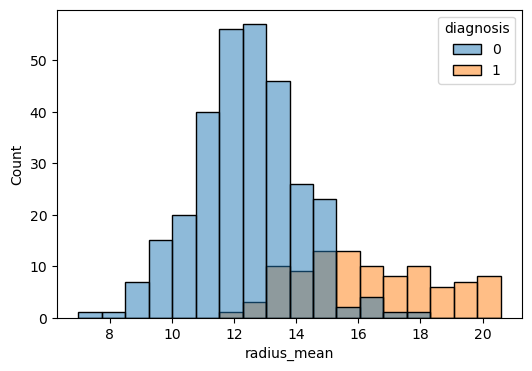

In [34]:
## Bar

plt.figure(figsize = (6, 4))

sns.histplot(data = df_copy, x = 'radius_mean', hue = 'diagnosis')
plt.show()

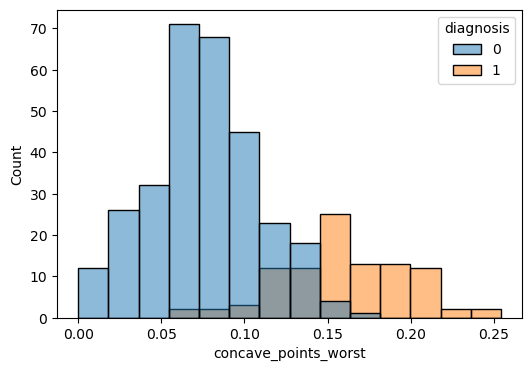

In [35]:
## Bar

plt.figure(figsize = (6, 4))

sns.histplot(data = df_copy, x = 'concave_points_worst', hue = 'diagnosis')
plt.show()

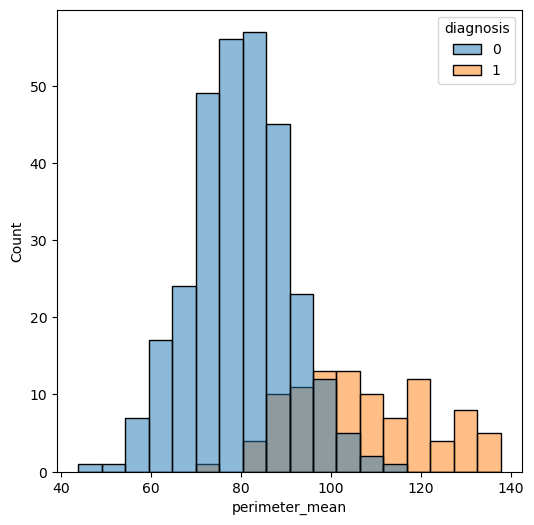

In [36]:
## Bar

plt.figure(figsize = (6, 6))

sns.histplot(data = df_copy, x = 'perimeter_mean', hue = 'diagnosis')
plt.show()

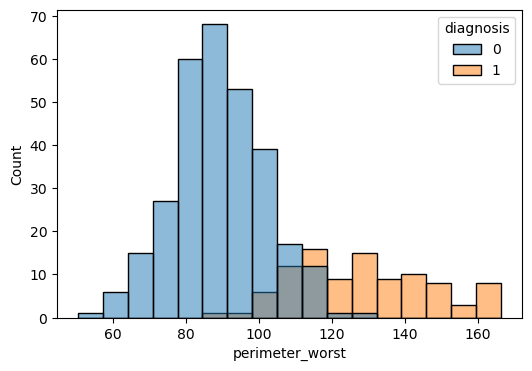

In [37]:
## Bar

plt.figure(figsize = (6, 4))

sns.histplot(data = df_copy, x = 'perimeter_worst', hue = 'diagnosis')
plt.show()

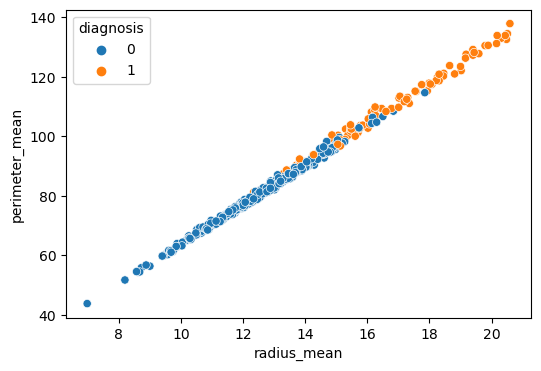

In [38]:
## Bar

plt.figure(figsize = (6, 4))

sns.scatterplot(data = df_copy, x = 'radius_mean', y = 'perimeter_mean', hue = 'diagnosis')
plt.show()

In [39]:
print(df_copy['diagnosis'].unique())
df_copy['diagnosis'].value_counts()

[1 0]


diagnosis
0    300
1     98
Name: count, dtype: int64

In [40]:
Malignant_vs_Benign = df_copy['diagnosis'].value_counts(normalize = True)
Malignant_vs_Benign

diagnosis
0    0.753769
1    0.246231
Name: proportion, dtype: float64

In [41]:
### After Removing outliers, we next have to normalize all the values to around the range 0  to 1

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


y = df_copy['diagnosis']
X = df_copy.drop(columns = ['diagnosis'])

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,  precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [43]:
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
##model selection

rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)

cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

## Training model using full data

rf_clf.fit(X_train, y_train)

print(f'Average Cross Validation Accuracy: {cv_scores.mean():.4f}')

pred_val = rf_clf.predict(X_test)

cm1 = confusion_matrix(y_test,pred_val)
print("Accuracy: ", accuracy_score(y_test,pred_val))
conf_matrix = sns.heatmap(cm1, annot=True,cmap=['lightblue','gray'])

print(conf_matrix)"""

'\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)\n##model selection\n\nrf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)\n\ncv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring=\'accuracy\')\n\n## Training model using full data\n\nrf_clf.fit(X_train, y_train)\n\nprint(f\'Average Cross Validation Accuracy: {cv_scores.mean():.4f}\')\n\npred_val = rf_clf.predict(X_test)\n\ncm1 = confusion_matrix(y_test,pred_val)\nprint("Accuracy: ", accuracy_score(y_test,pred_val))\nconf_matrix = sns.heatmap(cm1, annot=True,cmap=[\'lightblue\',\'gray\'])\n\nprint(conf_matrix)'

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [45]:
X_train.shape

(278, 30)

### HYperparameter tuning using GridSearchCV

In [46]:
# Hyperparameter tuning using GridSearchCV and Finding Best Paramters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]

}

grid_search = GridSearchCV(RandomForestClassifier(random_state  = 42), param_grid = param_grid_rf, cv = 5, scoring = "accuracy")
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_prediction = best_model.predict(X_test)


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [47]:
print("After GridSearch RF Accuracy Score: ", accuracy_score(y_test, y_prediction))
print(X_train.shape)

After GridSearch RF Accuracy Score:  0.925
(278, 30)


In [75]:
X_test.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

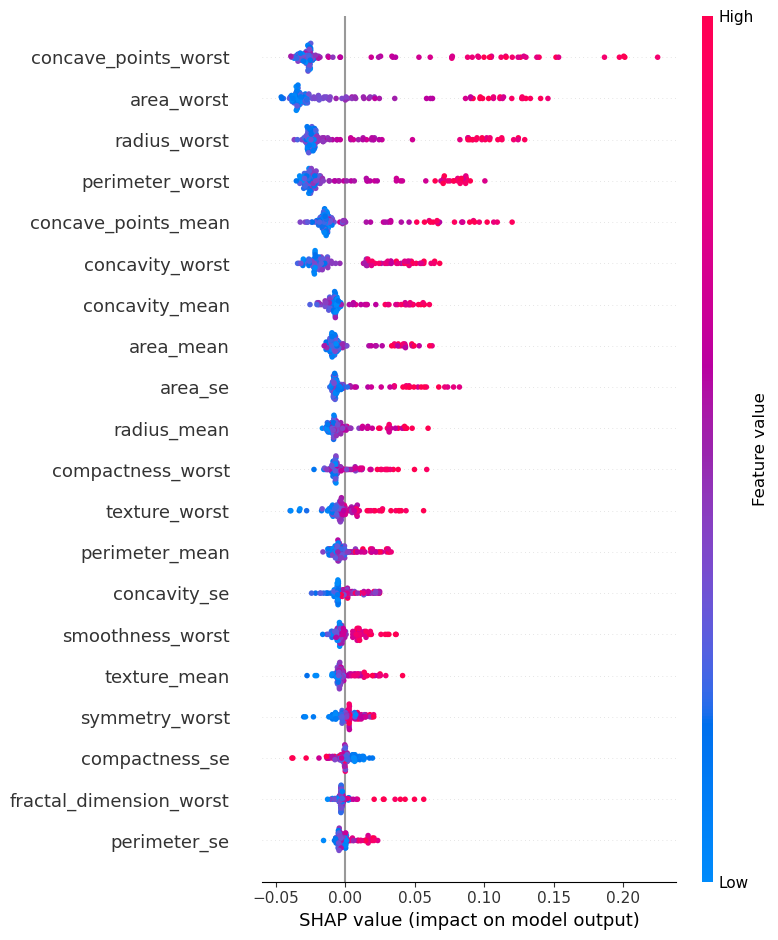

In [83]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_vals, X_test, feature_names=X.columns)

plt.show()

Plotting for: radius_mean


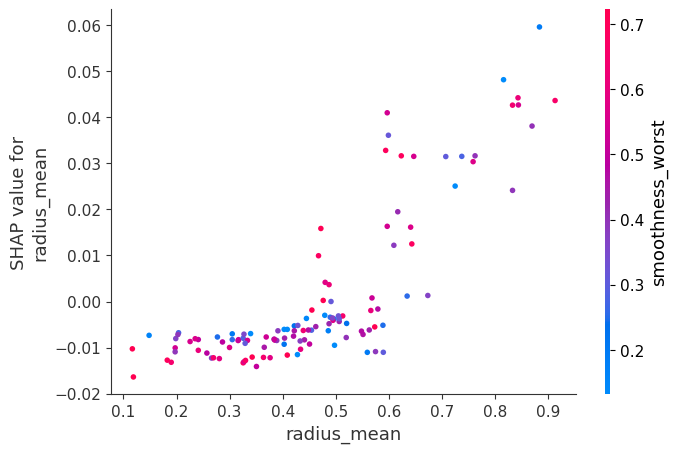

Plotting for: texture_mean


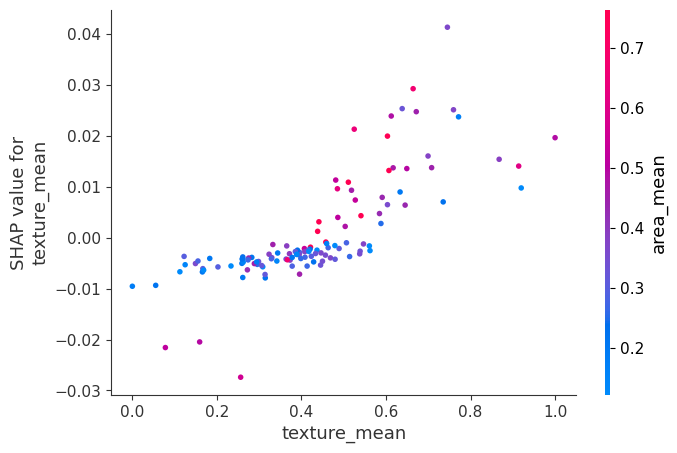

Plotting for: perimeter_mean


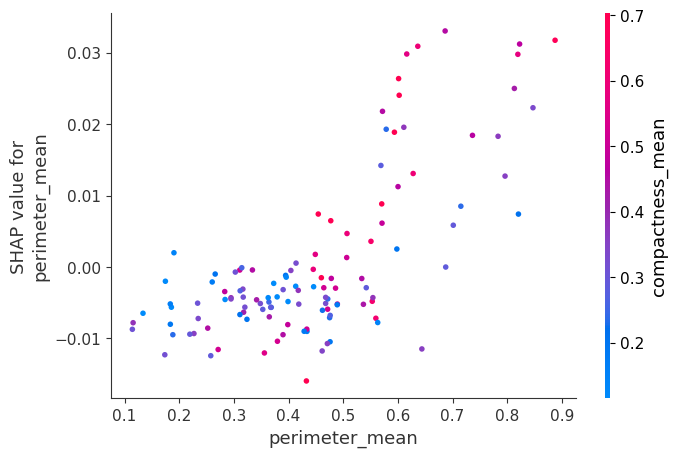

Plotting for: area_mean


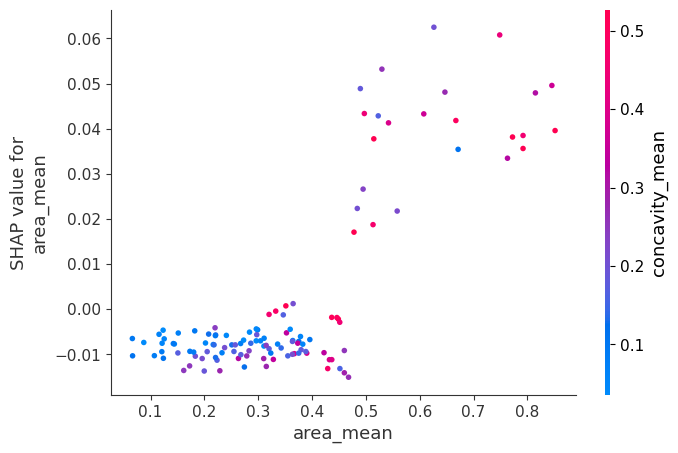

Plotting for: smoothness_mean


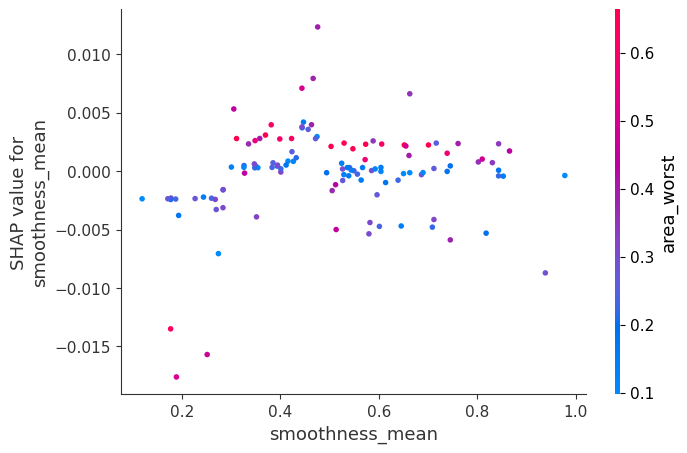

Plotting for: compactness_mean


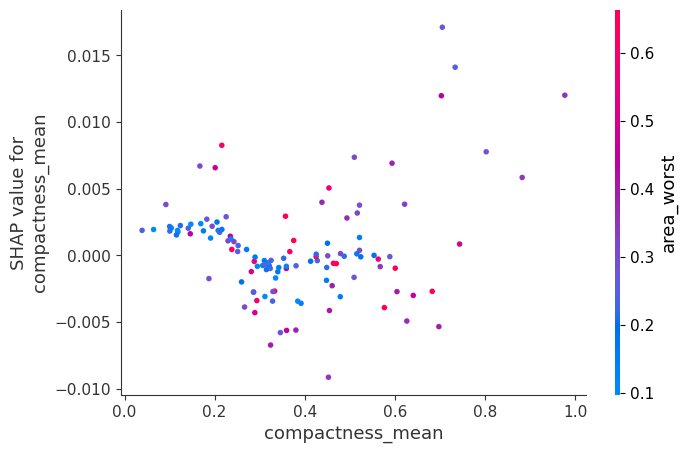

Plotting for: concavity_mean


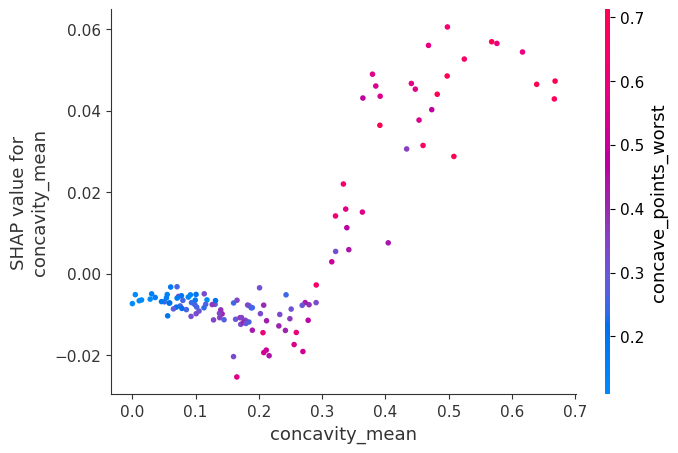

Plotting for: concave_points_mean


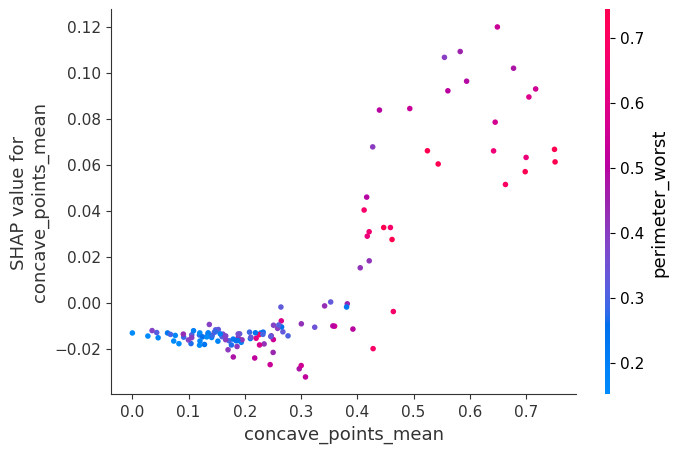

Plotting for: symmetry_mean


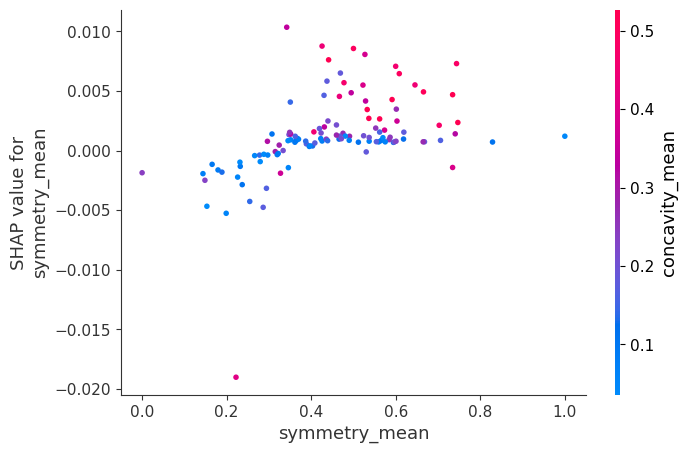

Plotting for: fractal_dimension_mean


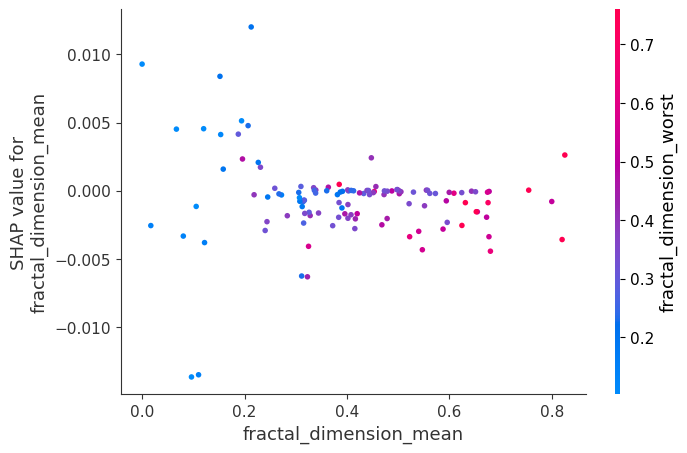

Plotting for: radius_se


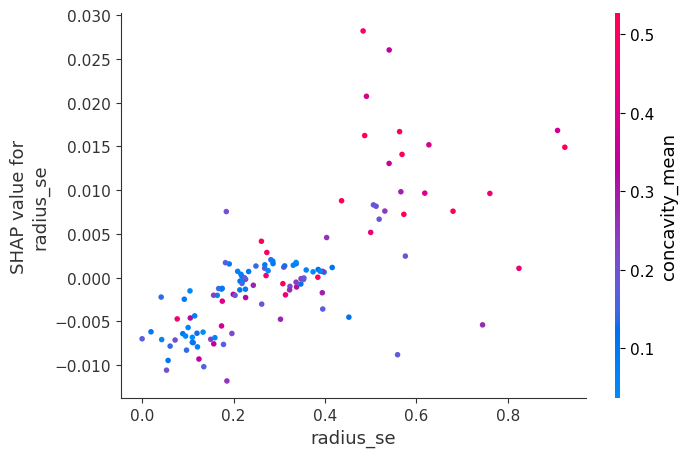

Plotting for: texture_se


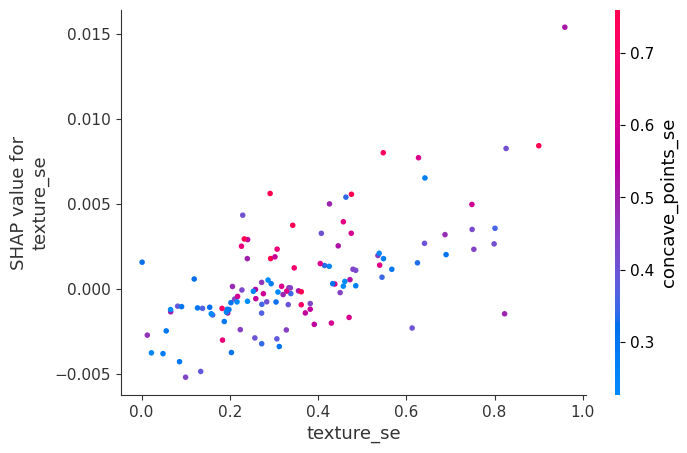

Plotting for: perimeter_se


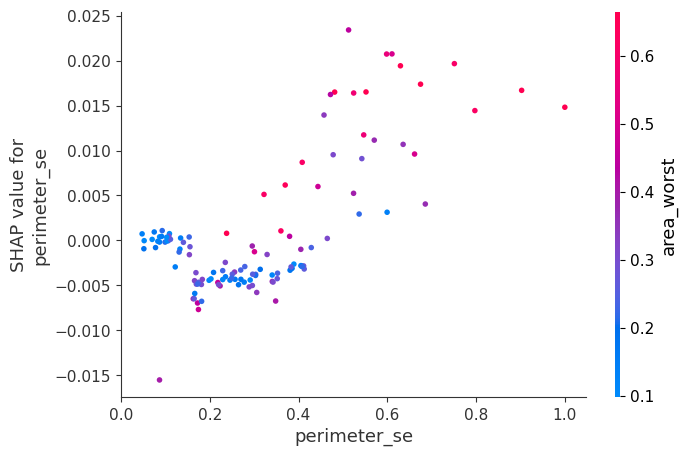

Plotting for: area_se


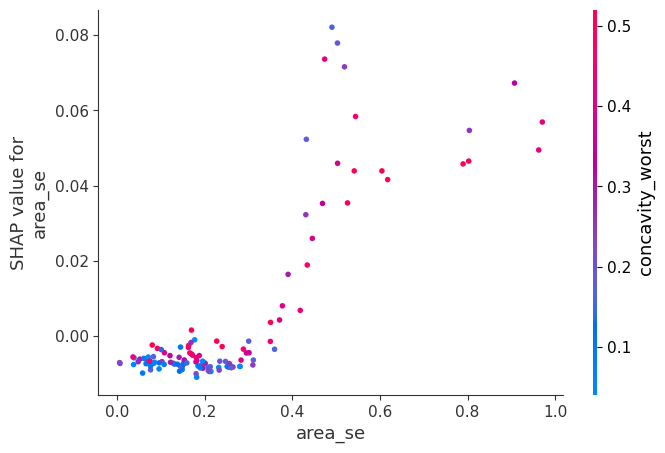

Plotting for: smoothness_se


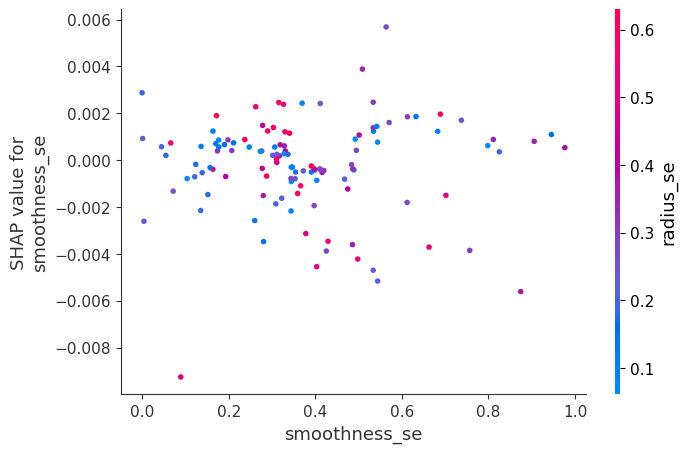

Plotting for: compactness_se


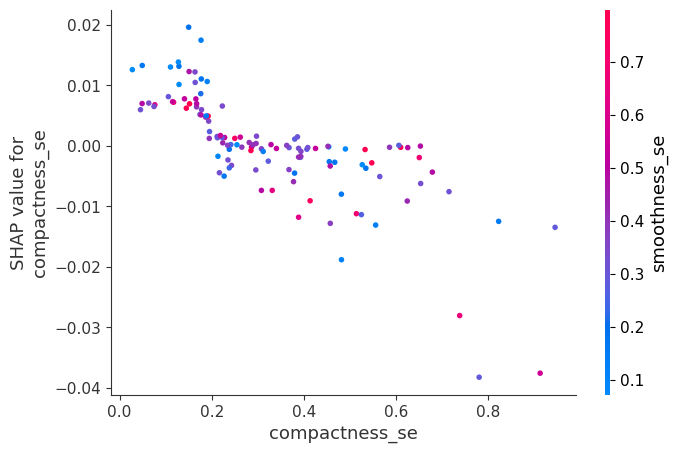

Plotting for: concavity_se


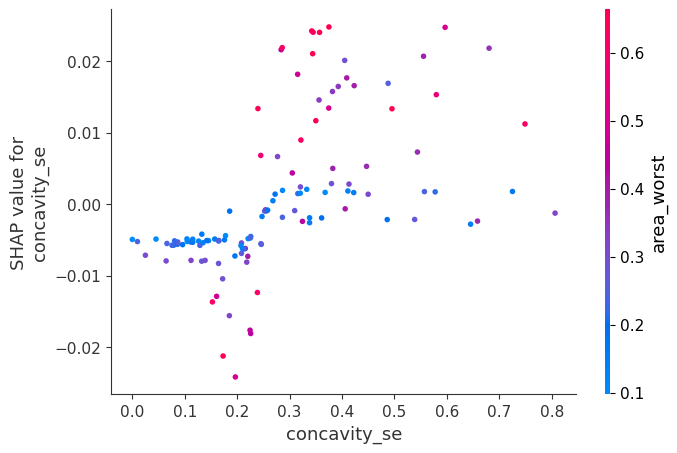

Plotting for: concave_points_se


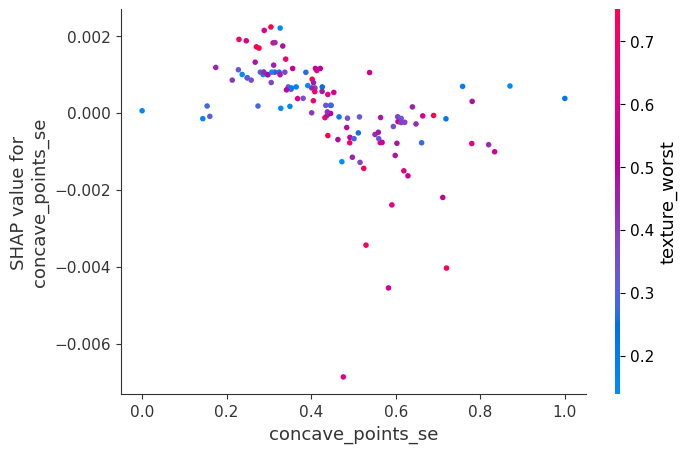

Plotting for: symmetry_se


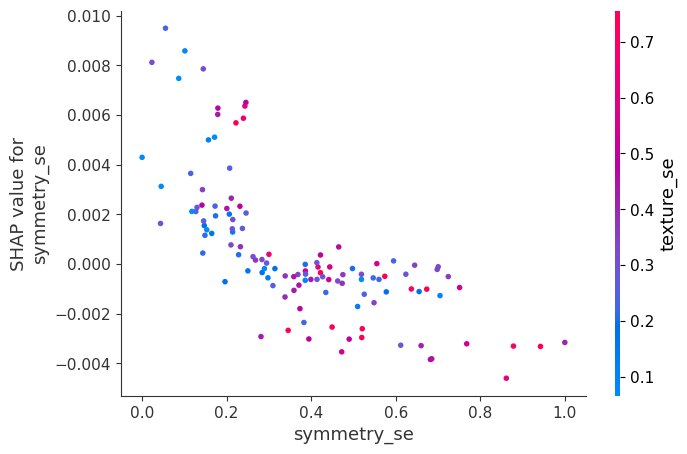

Plotting for: fractal_dimension_se


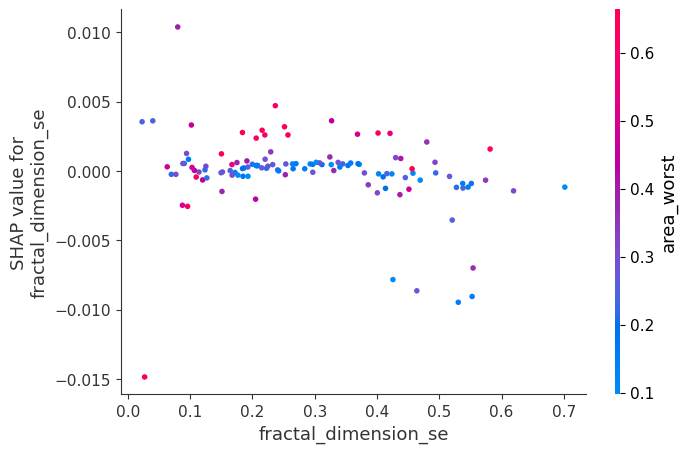

Plotting for: radius_worst


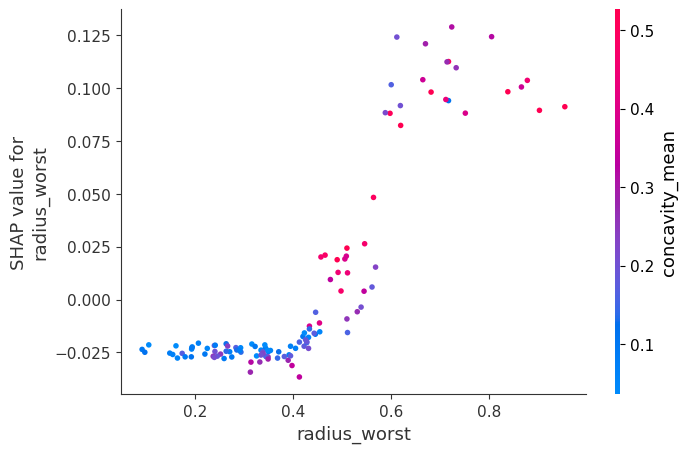

Plotting for: texture_worst


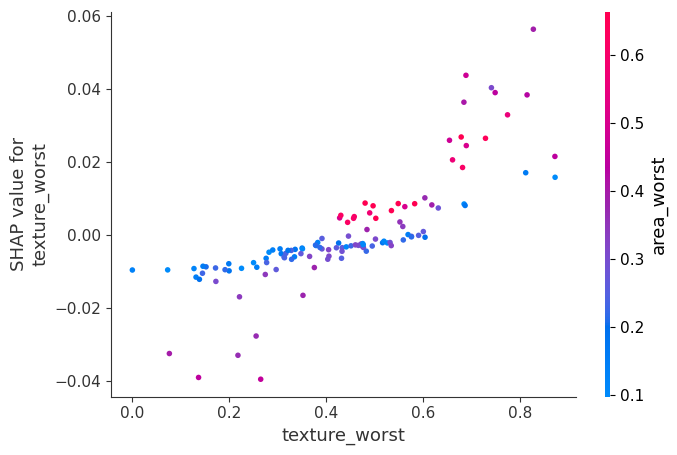

Plotting for: perimeter_worst


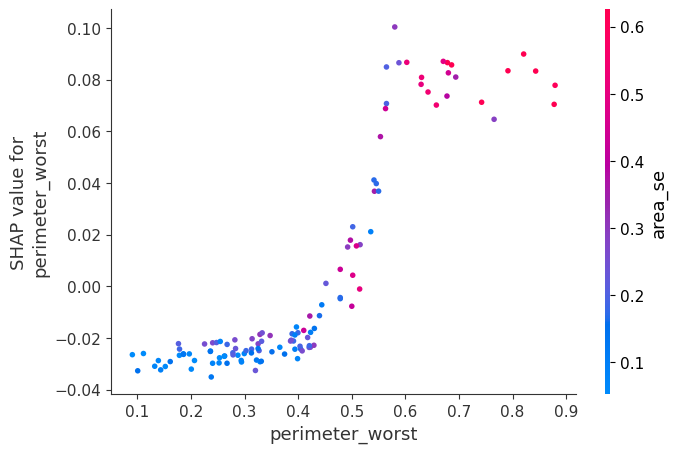

Plotting for: area_worst


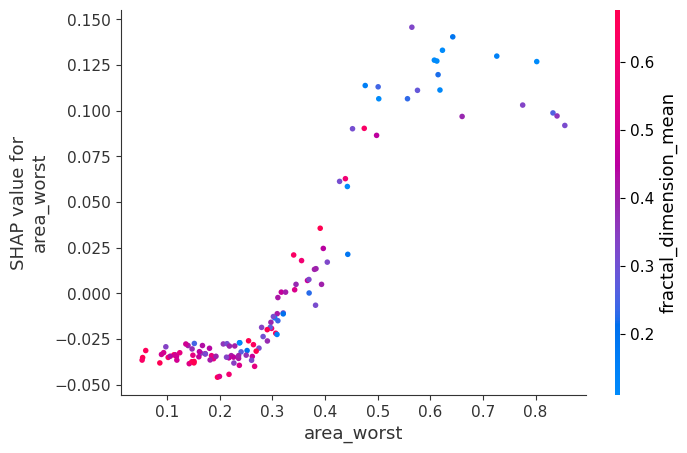

Plotting for: smoothness_worst


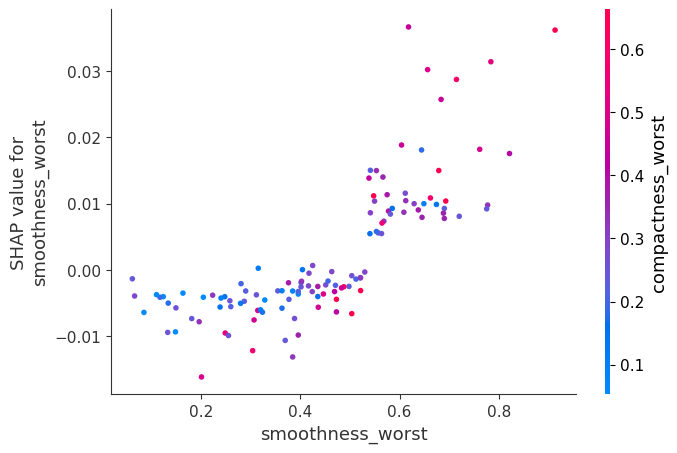

Plotting for: compactness_worst


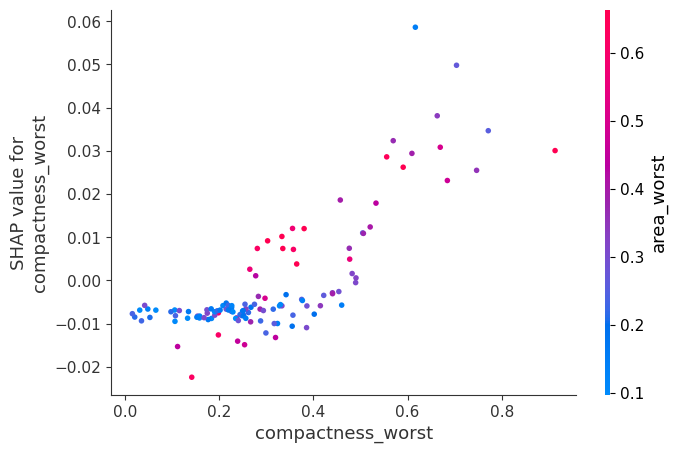

Plotting for: concavity_worst


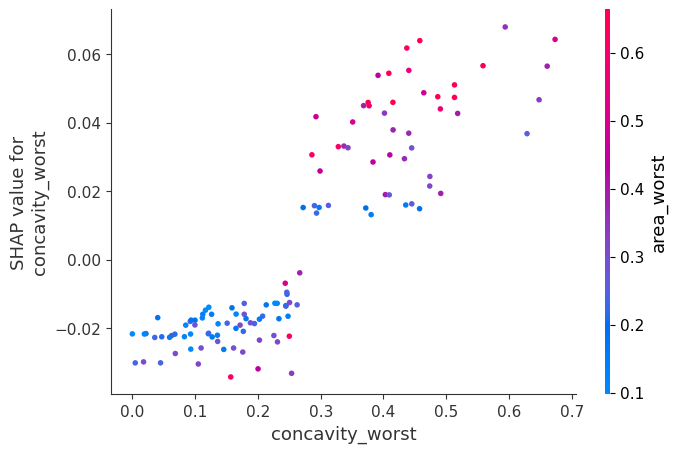

Plotting for: concave_points_worst


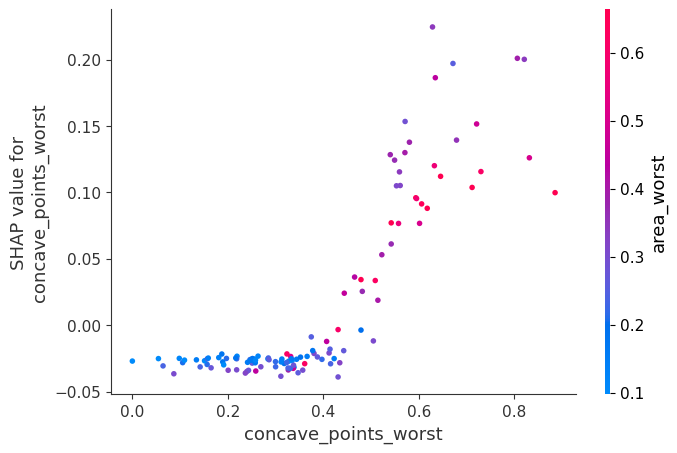

Plotting for: symmetry_worst


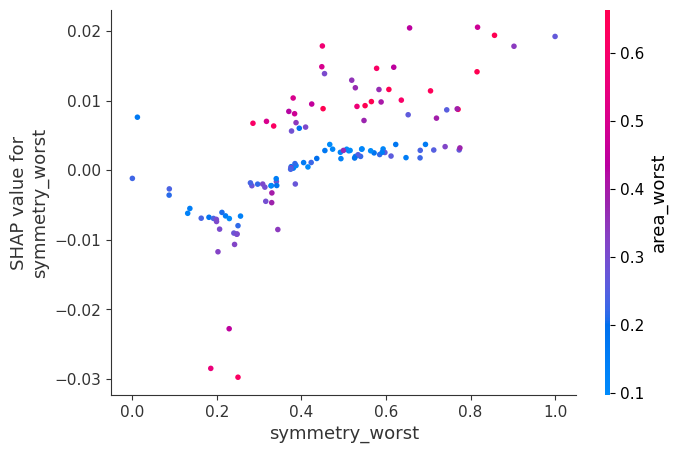

Plotting for: fractal_dimension_worst


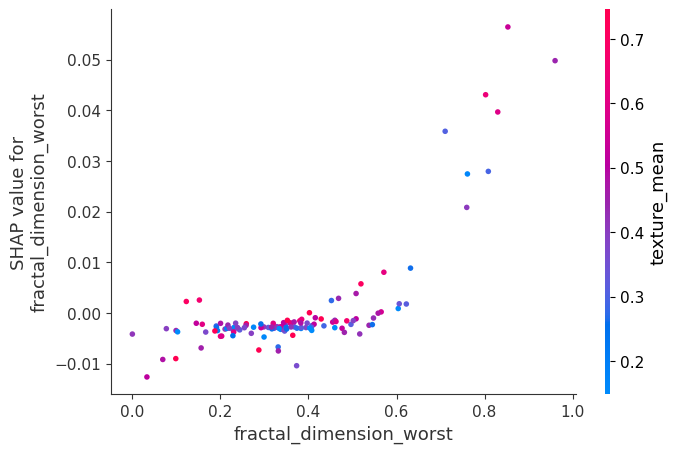

In [81]:
import shap
import matplotlib.pyplot as plt

shap_vals = shap_values.values[:, :, 1]  # shape: (n_samples, n_features)

for feature in X_test.columns:
    print(f"Plotting for: {feature}")
    shap.dependence_plot(
        feature,
        shap_vals,
        X_test,
        feature_names=X_test.columns,
        show=True
    )
    plt.show()


In [51]:
##For Decision we are  choosig the best paramaters directly using gridsearch

dec_clf = DecisionTreeClassifier(random_state = 42)

cv_scores_ = cross_val_score(dec_clf, X_train, y_train, cv=5, scoring='accuracy')

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}

grid_search_dec = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid_dt, cv = 5, scoring = "accuracy")
grid_search_dec.fit(X_train, y_train)

print(grid_search_dec.best_params_)
best_model_dec = grid_search_dec.best_estimator_

y_prediction_dec = best_model_dec.predict(X_test)


{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [52]:
print("RandomeForest Accuracy Score: ", accuracy_score(y_test, y_prediction))
print("Decision Tree Accuracy Score: ", accuracy_score(y_test, y_prediction_dec))


RandomeForest Accuracy Score:  0.925
Decision Tree Accuracy Score:  0.85


Accuracy score:
 0.85


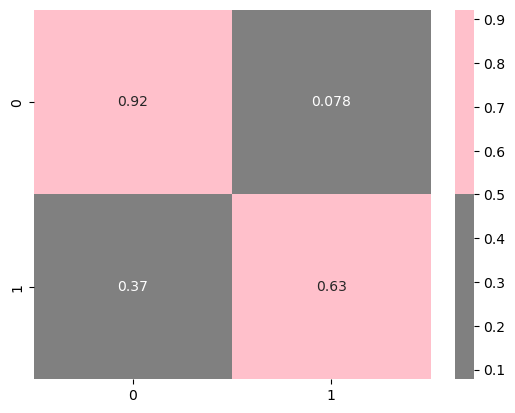

In [53]:
dec_conf = confusion_matrix(y_test,y_prediction_dec, normalize='true')

sns.heatmap(dec_conf, annot = True, cmap = ['gray', 'pink'])
print("Accuracy score:\n",accuracy_score(y_test, y_prediction_dec))


###  Feature Selection using Randomforest 

          features  importance
0      radius_mean    0.065493
1     texture_mean    0.014213
2   perimeter_mean    0.055861
3        area_mean    0.040397
4  smoothness_mean    0.006881


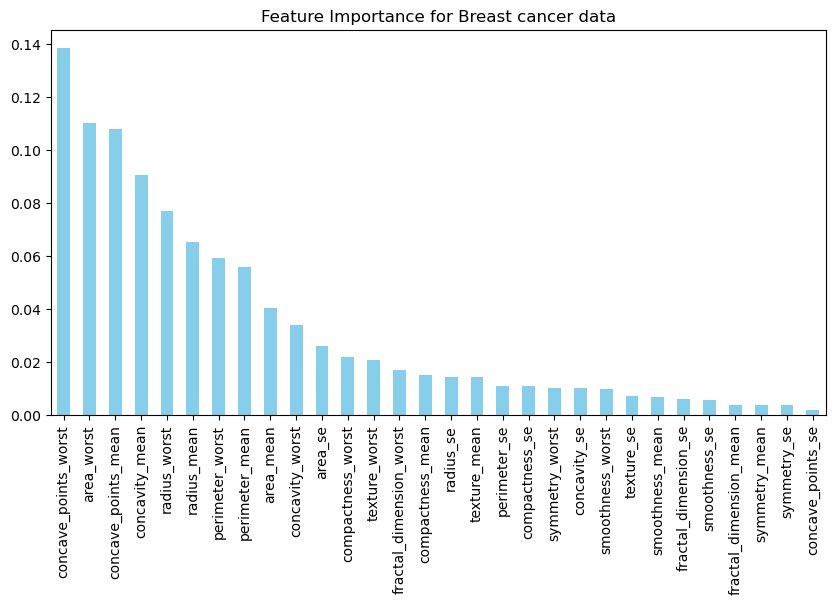

In [54]:


# Define features and target variable

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

imp_feat = pd.DataFrame({'features': X.columns, 'importance': rf.feature_importances_})
print(imp_feat.head())
#print(feature_importances[:10])
# Sort and plot
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Feature Importance for Breast cancer data')
plt.show()


In [55]:
### USING TOP 10 SELECTED FEATURES TO TEST RANDOM FOREST MODEL AGAIN 

In [56]:

from sklearn.ensemble import RandomForestClassifier


X_top = df_copy[['area_worst', 'concave_points_worst', 'concave_points_mean', 'radius_worst','radius_mean',  'perimeter_worst', 'perimeter_mean', "area_mean", 'concavity_mean', 'concavity_worst',  'area_se']]
y_top = df_copy['diagnosis']


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]

}
random_f = RandomForestClassifier(n_estimators = 100,random_state  = 42)

X_train, X_test, y_train, y_test = train_test_split(X_top, y_top, test_size = 0.3, random_state = 42)

cross_val_s = cross_val_score(random_f, X_train, y_train, cv = 5, scoring = 'accuracy')
print(cross_val_s)
print("cross_val_s: ", cross_val_s.mean())

grid_search_best_rf = GridSearchCV(RandomForestClassifier(random_state  = 42), param_grid, cv = 5, scoring = "accuracy")
grid_search_best_rf.fit(X_train, y_train)


print(grid_search_best_rf.best_params_)

best_model_feature = grid_search_best_rf.best_estimator_


[0.91071429 0.92857143 0.94642857 0.94545455 1.        ]
cross_val_s:  0.9462337662337662
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [57]:

y_prediction_feature = best_model_feature.predict(X_test)

print("accuracy score after feature selection: ",accuracy_score(y_test, y_prediction_feature))
print(classification_report(y_test, y_prediction_feature))

accuracy score after feature selection:  0.8916666666666667
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        86
           1       0.89      0.71      0.79        34

    accuracy                           0.89       120
   macro avg       0.89      0.84      0.86       120
weighted avg       0.89      0.89      0.89       120



In [58]:
print("Accuracy_score after Feature selection", accuracy_score( y_test, y_prediction_feature))


Accuracy_score after Feature selection 0.8916666666666667


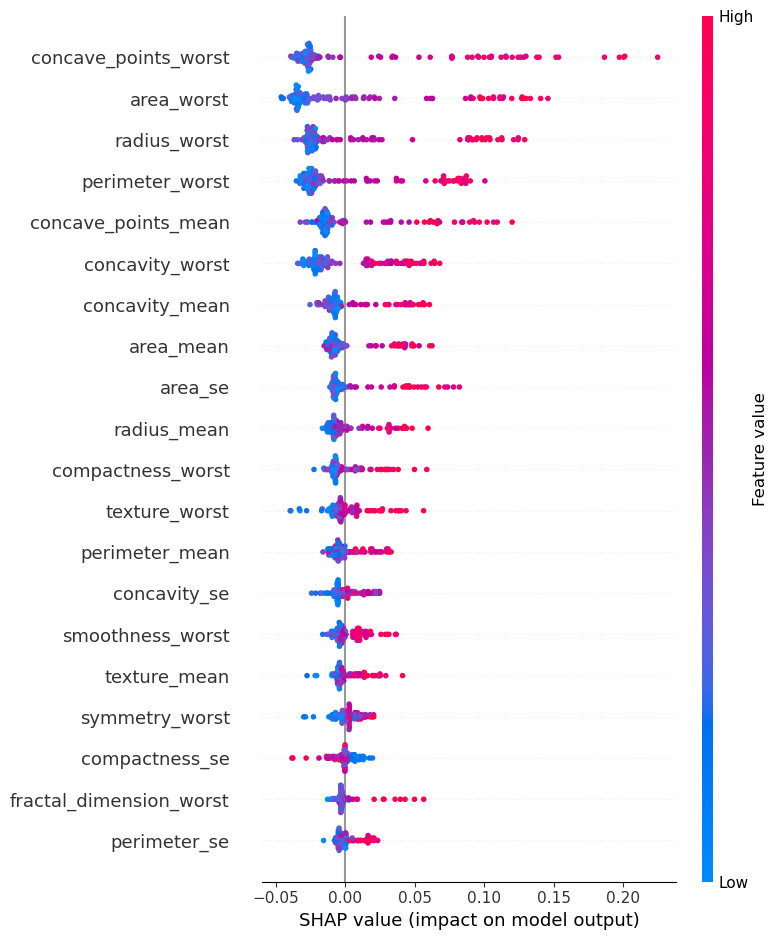

In [87]:

explainer = shap.Explainer(best_model_feature, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_vals, X_test, feature_names=X.columns)

plt.show()

In [61]:
## Using Neural Networks to test classification of cancer types

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [63]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D, Dropout
from keras.layers import Input, Flatten, Dense, BatchNormalization
from keras.utils import to_categorical

In [64]:
X_train.shape

(278, 30)

In [65]:
print(y_test.shape)
print(y_train.shape)

(120,)
(278,)


In [66]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

def binary_classification_model():
    ## Creating a model
    model = Sequential()
    model.add(Input(shape=(30, )))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [68]:

model = binary_classification_model()
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
          verbose=2, callbacks=[early_stop])
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/100
7/7 - 4s - 626ms/step - accuracy: 0.4640 - loss: 0.7120 - val_accuracy: 0.5357 - val_loss: 0.6809
Epoch 2/100
7/7 - 0s - 41ms/step - accuracy: 0.6622 - loss: 0.6500 - val_accuracy: 0.6250 - val_loss: 0.6683
Epoch 3/100
7/7 - 0s - 35ms/step - accuracy: 0.7838 - loss: 0.6125 - val_accuracy: 0.6250 - val_loss: 0.6673
Epoch 4/100
7/7 - 0s - 40ms/step - accuracy: 0.7748 - loss: 0.5917 - val_accuracy: 0.6250 - val_loss: 0.6734
Epoch 5/100
7/7 - 0s - 32ms/step - accuracy: 0.7928 - loss: 0.5643 - val_accuracy: 0.6250 - val_loss: 0.6824
Epoch 6/100
7/7 - 0s - 49ms/step - accuracy: 0.7928 - loss: 0.5410 - val_accuracy: 0.6250 - val_loss: 0.6792
Epoch 7/100
7/7 - 0s - 31ms/step - accuracy: 0.7838 - loss: 0.5406 - val_accuracy: 0.6250 - val_loss: 0.6693
Epoch 8/100
7/7 - 0s - 35ms/step - accuracy: 0.7838 - loss: 0.5253 - val_accuracy: 0.6250 - val_loss: 0.6507
Epoch 9/100
7/7 - 0s - 29ms/step - accuracy: 0.8018 - loss: 0.4975 - val_accuracy: 0.6250 - val_loss: 0.6230
Epoch 10/100
7/7 -

Epoch 76/100
7/7 - 0s - 38ms/step - accuracy: 0.9550 - loss: 0.1255 - val_accuracy: 0.9107 - val_loss: 0.1793
Epoch 77/100
7/7 - 0s - 71ms/step - accuracy: 0.9505 - loss: 0.1610 - val_accuracy: 0.9107 - val_loss: 0.1745
Epoch 78/100
7/7 - 0s - 54ms/step - accuracy: 0.9595 - loss: 0.1309 - val_accuracy: 0.9107 - val_loss: 0.1615
Epoch 79/100
7/7 - 0s - 55ms/step - accuracy: 0.9459 - loss: 0.1493 - val_accuracy: 0.9286 - val_loss: 0.1442
Epoch 80/100
7/7 - 0s - 46ms/step - accuracy: 0.9640 - loss: 0.0995 - val_accuracy: 0.9107 - val_loss: 0.1666
Epoch 81/100
7/7 - 0s - 48ms/step - accuracy: 0.9640 - loss: 0.1082 - val_accuracy: 0.8929 - val_loss: 0.1791
Epoch 82/100
7/7 - 0s - 44ms/step - accuracy: 0.9595 - loss: 0.1238 - val_accuracy: 0.9107 - val_loss: 0.1673
Epoch 83/100
7/7 - 0s - 60ms/step - accuracy: 0.9685 - loss: 0.1249 - val_accuracy: 0.9286 - val_loss: 0.1441
Epoch 84/100
7/7 - 1s - 95ms/step - accuracy: 0.9550 - loss: 0.1324 - val_accuracy: 0.9286 - val_loss: 0.1562
Epoch 85/1

In [69]:
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')


Test loss: 0.125, Test accuracy: 0.950
